# Visualizing microprofiling results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data = pd.read_csv('microprof_results/test5.csv')
data['acc_error'] = (data['accuracy_pred'] - data['accuracy_actual'])#.abs()
data['runtime_error'] = (data['runtime_pred'] - data['runtime_actual'])#.abs()
data['acc_error_percent'] = (100*(data['accuracy_pred'] - data['accuracy_actual'])/data['accuracy_actual'])#.abs()
data['runtime_error_percent'] = (100*(data['runtime_pred'] - data['runtime_actual'])/data['runtime_actual'])#.abs()

data['runtime_error2'] = ((data['runtime_timeperepoch_actual']*data['epochs'] + data['runtime_inittime_actual']) - data['runtime_actual'])
data['runtime_error2_percent'] = (100*(data['runtime_error2'])/data['runtime_actual'])#.abs()

In [3]:
data

,city,task_id,hp_id,epochs,accuracy_pred,runtime_pred,accuracy_actual,runtime_actual,default_inference_acc_pred,default_inference_acc_actual,microprofile_time_taken,runtime_inittime_pred,runtime_timeperepoch_pred,runtime_inittime_actual,runtime_timeperepoch_actual,acc_error,runtime_error,acc_error_percent,runtime_error_percent,runtime_error2,runtime_error2_percent
0,zurich,1,0,5,0.779320,13.121410,0.821429,4.750107,0.750000,0.738095,16.116226,0.327802,0.255872,0.320087,0.849090,-0.042109,8.371303,-5.126291,176.233983,-0.184570,-3.885593
1,zurich,1,0,15,0.832889,38.708625,0.857143,12.711948,0.750000,0.738095,16.116226,0.327802,0.255872,0.376337,0.698852,-0.024254,25.996678,-2.829631,204.505858,-1.852830,-14.575504
2,zurich,1,0,30,0.887735,77.089448,0.845238,22.300569,0.750000,0.738095,16.116226,0.327802,0.255872,0.364400,0.669717,0.042497,54.788880,5.027821,245.683776,-1.844661,-8.271810
3,zurich,1,1,5,0.648030,24.864577,0.857143,16.948521,0.625000,0.738095,16.116226,0.097869,0.495334,0.342619,2.945332,-0.209113,7.916056,-24.396515,46.706471,-1.879243,-11.087949
4,zurich,1,1,15,0.692933,74.397992,0.880952,38.371304,0.625000,0.738095,16.116226,0.097869,0.495334,0.340852,2.416718,-0.188019,36.026688,-21.342689,93.889663,-1.779688,-4.638070
5,zurich,1,1,30,0.742253,148.698114,0.892857,71.874873,0.625000,0.738095,16.116226,0.097869,0.495334,0.329638,2.325756,-0.150604,76.823241,-16.867647,106.884698,-1.772556,-2.466169
6,zurich,1,2,5,0.947957,22.060907,0.833333,29.553883,0.875000,0.738095,16.116226,0.102077,0.439177,0.323308,5.385854,0.114624,-7.492976,13.754836,-25.353610,-2.301303,-7.786803
7,zurich,1,2,15,0.947957,65.978568,0.880952,74.502469,0.875000,0.738095,16.116226,0.102077,0.439177,0.325076,4.795878,0.067005,-8.523901,7.605926,-11.441099,-2.239225,-3.005572
8,zurich,1,2,30,0.947957,131.855059,0.869048,141.794889,0.875000,0.738095,16.116226,0.102077,0.439177,0.333655,4.640692,0.078909,-9.939830,9.079980,-7.010006,-2.240463,-1.580073
9,zurich,1,3,5,0.648030,12.184764,0.857143,8.065931,0.625000,0.797619,16.116226,0.058392,0.242527,0.328416,1.091332,-0.209113,4.118833,-24.396515,51.064569,-2.280853,-28.277620


In [4]:
(100*(data['accuracy_pred'] - data['accuracy_actual'])/data['accuracy_actual']).abs().median()

6.7695442933403775

In [5]:
data.groupby('epochs').mean()['acc_error_percent']

epochs
5    -2.178930
15    1.919152
30    5.540195
Name: acc_error_percent, dtype: float64

In [6]:
data.groupby('epochs').mean()['acc_error']

epochs
5    -0.022263
15    0.011847
30    0.040958
Name: acc_error, dtype: float64

In [7]:
data.groupby('epochs').mean()['runtime_error']

epochs
5     -5.835741
15    -8.080504
30   -11.041788
Name: runtime_error, dtype: float64

In [8]:
data.groupby('epochs').mean()['runtime_error_percent']

epochs
5     10.673572
15    34.148454
30    48.106513
Name: runtime_error_percent, dtype: float64

In [14]:
aspect = 1.4
height = 2.5
# params = {'legend.fontsize': 'x-large',
#           'figure.figsize': (15, 5),
#          'axes.labelsize': 'x-large',
#          'axes.titlesize':'x-large',
#          'xtick.labelsize':'x-large',
#          'ytick.labelsize':'x-large'}

params = {'axes.labelsize': 'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
plt.rcParams.update(params)

Text(0, 0.5, 'Count')

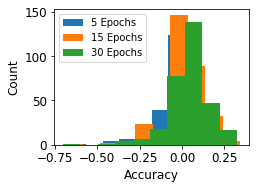

In [15]:
hist_data = data.groupby('epochs')['acc_error'].apply(list)
epochs = hist_data.index.values

fig = plt.figure(figsize=[aspect*height, height])
ax=plt.gca()
for e in epochs:
    ax.hist(hist_data[e], label='{} Epochs'.format(e))
ax.legend()
ax.set_xlabel('Accuracy')
ax.set_ylabel('Count')
#hist(bins=10, density=True)#, histtype='stepfilled')
#ax.legend()

NameError: name 'stats' is not defined

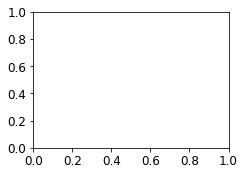

In [16]:
bins = np.linspace(0, 0.2, 30)
hist_data = data.groupby('epochs')['acc_error'].apply(list)
epochs = hist_data.index.values

fig = plt.figure(figsize=[aspect*height, height])
ax=plt.gca()
for e in epochs:
    density = stats.gaussian_kde(hist_data[e])
    n, x, _ = plt.hist(hist_data[e], bins=bins, 
                   histtype=u'step', density=True)  
    #ax.hist(hist_data[e], label='{} Epochs'.format(e))
    plt.plot(x, density(x))
ax.legend()
ax.set_xlabel('Accuracy')
ax.set_ylabel('Count')
#hist(bins=10, density=True)#, histtype='stepfilled')
#ax.legend()

In [ ]:
data['acc_error']

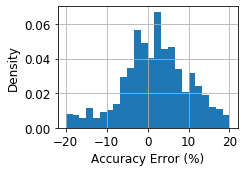

In [17]:
import matplotlib.ticker as ticker
bins = np.linspace(-20, 20, 25)
fig = plt.figure(figsize=[aspect*height, height])
ax=plt.gca()

#ax = data.groupby('epochs')['acc_error'].apply(list).hist(bins=bins, density=True,ax=ax)
ax = (data['acc_error']*100).hist(ax=ax,bins=bins,density=True)
ax.set_xlabel('Accuracy Error (%)')
ax.set_ylabel('Density')
plt.tight_layout()

import matplotlib.patches as mpatches

#patches = [mpatches.Patch(color='C0', label='100% Data')]
#            mpatches.Patch(color='C1', label='15 Epochs, 100% Data'),
#            mpatches.Patch(color='C2', label='30 Epochs, 100% Data')]
#plt.legend(handles=patches)
#plt.title('Prediction Error when Microprofiled with 5 epochs, 10% data')
plt.savefig('microprofiling_accerror.pdf')

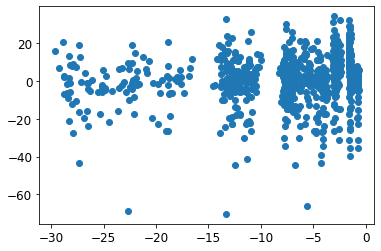

In [18]:
plt.scatter(data['runtime_error2_percent'], data['acc_error']*100)

In [67]:
data['runtime_error2_percent']

0      -3.885593
1     -14.575504
2      -8.271810
3     -11.087949
4      -4.638070
5      -2.466169
6      -7.786803
7      -3.005572
8      -1.580073
9     -28.277620
10    -12.781779
11     -7.026301
12     -7.742960
13     -2.943852
14     -1.489021
15     -4.113407
16     -1.469797
17     -0.778912
18     -5.953974
19    -22.625535
20    -13.140398
21    -13.824054
22     -5.717042
23     -3.019506
24     -7.454103
25     -2.957776
26     -1.553231
27    -27.397381
28    -12.452817
29     -6.971554
30     -7.641410
31     -2.838129
32     -1.486865
33     -3.966123
34     -1.446551
35     -0.740735
36     -5.822684
37    -21.622514
38    -12.913370
39    -13.307789
40     -5.608319
41     -3.092035
42     -7.553810
43     -2.911992
44     -1.524426
45    -26.580344
46    -12.505404
47     -6.854007
48     -7.456461
49     -2.884107
50     -1.453954
51     -4.009084
52     -1.440964
53     -0.748757
54     -2.991401
55    -16.721288
56    -10.007543
57    -10.367101
58     -4.3791

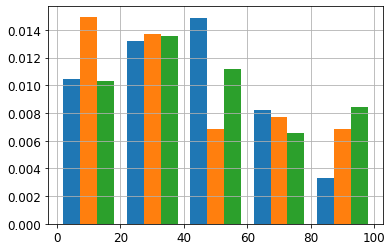

In [13]:
data.groupby('epochs')['runtime_error_percent'].apply(list).hist(bins=5, density=True, range=[0,100])

## Time per epoch evaluation

In [8]:
data.groupby(['hp_id', 'epochs'])['runtime_timeperepoch_actual'].mean()

hp_id  epochs
0      5          0.707807
       15         0.534124
       30         0.501669
1      5          2.849982
       15         2.499949
       30         2.417802
2      5          5.581661
       15         4.970402
       30         4.816822
3      5          1.175698
       15         1.048220
       30         1.025524
4      5          5.493985
       15         5.172083
       30         5.093121
5      5         10.898727
       15        10.309714
       30        10.155303
Name: runtime_timeperepoch_actual, dtype: float64

In [16]:
data.groupby(['hp_id'])['runtime_timeperepoch_actual'].mean()

hp_id
0     0.581200
1     2.589245
2     5.122962
3     1.083147
4     5.253063
5    10.454581
Name: runtime_timeperepoch_actual, dtype: float64

hp_id  epochs
0      5         AxesSubplot(0.125,0.125;0.775x0.755)
       15        AxesSubplot(0.125,0.125;0.775x0.755)
       30        AxesSubplot(0.125,0.125;0.775x0.755)
1      5         AxesSubplot(0.125,0.125;0.775x0.755)
       15        AxesSubplot(0.125,0.125;0.775x0.755)
       30        AxesSubplot(0.125,0.125;0.775x0.755)
2      5         AxesSubplot(0.125,0.125;0.775x0.755)
       15        AxesSubplot(0.125,0.125;0.775x0.755)
       30        AxesSubplot(0.125,0.125;0.775x0.755)
3      5         AxesSubplot(0.125,0.125;0.775x0.755)
       15        AxesSubplot(0.125,0.125;0.775x0.755)
       30        AxesSubplot(0.125,0.125;0.775x0.755)
4      5         AxesSubplot(0.125,0.125;0.775x0.755)
       15        AxesSubplot(0.125,0.125;0.775x0.755)
       30        AxesSubplot(0.125,0.125;0.775x0.755)
5      5         AxesSubplot(0.125,0.125;0.775x0.755)
       15        AxesSubplot(0.125,0.125;0.775x0.755)
       30        AxesSubplot(0.125,0.125;0.775x0.755)
Name: runtime_

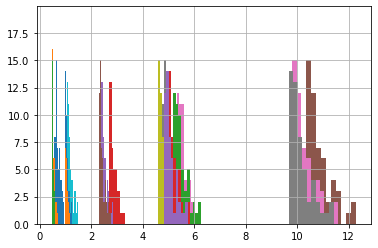

In [7]:
data.groupby(['hp_id', 'epochs'])['runtime_timeperepoch_actual'].hist()

In [6]:
data.groupby(['hp_id', 'epochs'])['runtime_inittime_actual'].mean()

hp_id  epochs
0      5         0.375654
       15        0.395373
       30        0.394705
1      5         0.393295
       15        0.393116
       30        0.393578
2      5         0.394270
       15        0.394391
       30        0.394636
3      5         0.393713
       15        0.392854
       30        0.395317
4      5         0.392723
       15        0.392950
       30        0.393889
5      5         0.393592
       15        0.393672
       30        0.393857
Name: runtime_inittime_actual, dtype: float64

hp_id  epochs
0      5         AxesSubplot(0.125,0.125;0.775x0.755)
       15        AxesSubplot(0.125,0.125;0.775x0.755)
       30        AxesSubplot(0.125,0.125;0.775x0.755)
1      5         AxesSubplot(0.125,0.125;0.775x0.755)
       15        AxesSubplot(0.125,0.125;0.775x0.755)
       30        AxesSubplot(0.125,0.125;0.775x0.755)
2      5         AxesSubplot(0.125,0.125;0.775x0.755)
       15        AxesSubplot(0.125,0.125;0.775x0.755)
       30        AxesSubplot(0.125,0.125;0.775x0.755)
3      5         AxesSubplot(0.125,0.125;0.775x0.755)
       15        AxesSubplot(0.125,0.125;0.775x0.755)
       30        AxesSubplot(0.125,0.125;0.775x0.755)
4      5         AxesSubplot(0.125,0.125;0.775x0.755)
       15        AxesSubplot(0.125,0.125;0.775x0.755)
       30        AxesSubplot(0.125,0.125;0.775x0.755)
5      5         AxesSubplot(0.125,0.125;0.775x0.755)
       15        AxesSubplot(0.125,0.125;0.775x0.755)
       30        AxesSubplot(0.125,0.125;0.775x0.755)
Name: runtime_

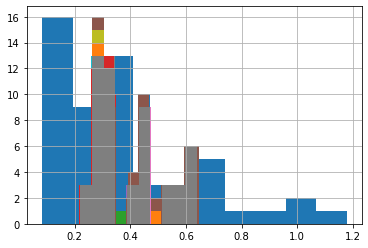

In [9]:
data.groupby(['hp_id', 'epochs'])['runtime_inittime_actual'].hist()

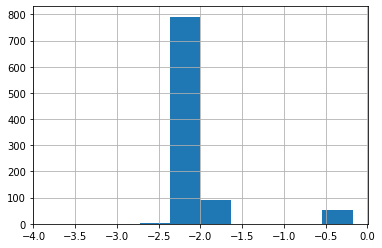

In [14]:
#Verify that static numbers work
((data['runtime_timeperepoch_actual']*data['epochs'] + data['runtime_inittime_actual']) - data['runtime_actual']).hist()

In [18]:
epoch_data = data.groupby(['hp_id'])['runtime_timeperepoch_actual'].mean()
inittime_data = data.groupby(['hp_id'])['runtime_inittime_actual'].mean()

In [19]:
epoch_data

hp_id
0     0.581200
1     2.589245
2     5.122962
3     1.083147
4     5.253063
5    10.454581
Name: runtime_timeperepoch_actual, dtype: float64

In [29]:
runtime_timeperepoch_actual = {str(e): t for e,t in epoch_data.iteritems()}
runtime_inittime_actual = {str(e): t for e,t in inittime_data.iteritems()}

In [30]:
# Map of hp_id to epoch time
runtime_timeperepoch_actual

{'0': 0.5811999924162512,
 '1': 2.589244502528101,
 '2': 5.122961855087524,
 '3': 1.0831474777979728,
 '4': 5.253062858846452,
 '5': 10.45458148906373}

In [31]:
# Map of hp_id to init time
runtime_inittime_actual

{'0': 0.3885770027454083,
 '1': 0.3933294797554994,
 '2': 0.39443214581562924,
 '3': 0.3939613333115211,
 '4': 0.3931872111100417,
 '5': 0.3937070430853428}